# S03 T02: Visualització gràfica de Múltiples variables
<span class="mark"># TIPS DATASET -----------------------------------------------------------------------------------------------------------------------------------------------------------------</span>
### Nivell 1

###### - Exercici 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

## EXAMINING NUMERICAL DATA

In [868]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## EXPLORING BIVARIATE VARIABLES WITH SCATTERPLOTS

In [869]:
# Open the choosen file
tips = sns.load_dataset("tips")

In [870]:
tips.shape

(244, 7)

In [871]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [872]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [873]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [874]:
tips.time.nunique()

2

In [875]:
tips.describe().round(3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


In [876]:
print("total_bill = ", round(tips.total_bill.mean(), 2))
print("tip = ", round(tips.tip.mean(), 2))

total_bill =  19.79
tip =  3.0


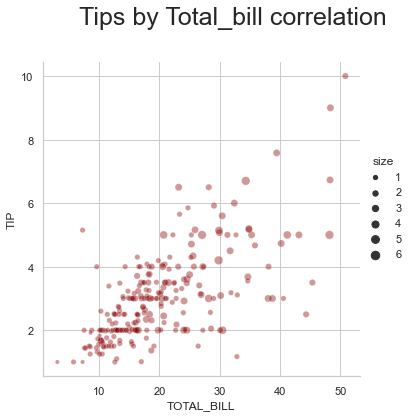

In [877]:
#plot
sns.set_context("notebook") 
sns.relplot(kind="scatter", x="total_bill", y="tip", data=tips, size="size", color="darkred", alpha=0.4)
plt.title("Tips by Total_bill correlation", size=25, y=1.1, x=0.60)
plt.ylabel("TIP")
plt.xlabel("TOTAL_BILL")
plt.show()

<font color='blue'>It seems there's a clear relationship between the total bill amount and the tip left by the customers. But, does the size of the table have anything to say about the total tip? Let's deep dive with a plot focused on the matter:

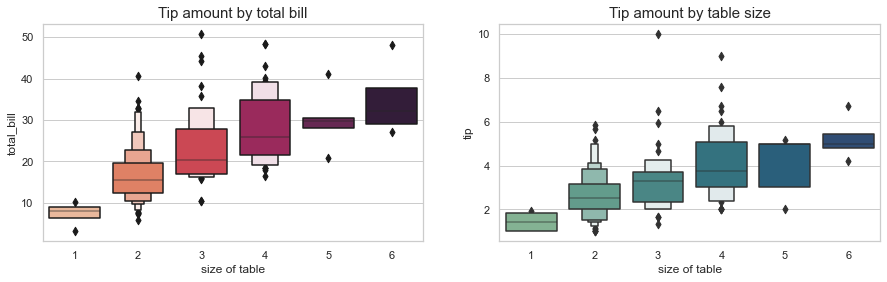

In [878]:
sns.set_context("notebook")

#creation of two subplots
fig, axes = plt.subplots(1,2, figsize=[15,4])

#first subplot
ax0 = sns.boxenplot(data=tips, x="size", y="total_bill", ax=axes[0], palette="rocket_r")
ax0.set_xlabel("size of table")
ax0.set_title("Tip amount by total bill", size=15)

#second subplot
ax1 = sns.boxenplot(data=tips, x="size", y="tip", ax=axes[1], palette="crest")
ax1.set_xlabel("size of table")
ax1.set_title("Tip amount by table size", size=15)
plt.show()

<font color='blue'>The first subplot confirms the relation bigger table-higher bill. There can also be noted that the bigger the table, the more concentred are the different tip amounts. However, this could be driven by the few amount of tables with 5-6 people.
The second subplot confirms that if we replace the total bill by the tip in the same analysis, we still see a correlation size of table and tip; however not so marked as the total bill value. As we can see, the highest tips were left by tables of 4-5 customers, not 6.

### MATRIX PLOTS

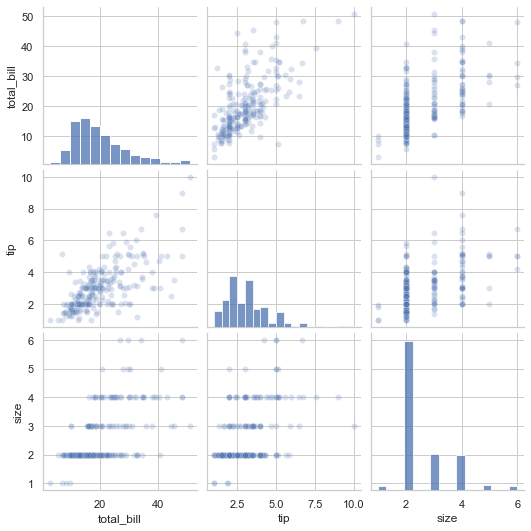

In [879]:
# Matrix plot
sns.pairplot(tips, diag_kind='hist', plot_kws={'alpha': 0.2})

<font color='blue'>This powerfull plot offers a lot of data, cross-checking the correlations discussed before between total_bill, tip and size of table, but all in the same plot.
Looking at it, we make out that:
1) The average bill is at around 20  <br>
2) Thw total bill is higher when the table is bigger, however the data for tables of 5-6 customers is scarce, so it's difficult to assure. <br>
3) The tips are higher at the same ratio as the bill is (as we've seen before) <br>
4) Then the tips, similar to the bill, are concentrated on the first third of the distribution (2-3) <br>
5) The tips increase with the bigger tables, but same as before, there are very few big tables in the database to include it as a remarkable conclusion. <br>
6) The bigger portion of tables are composed of 2 customers. 3 and 4 are less common but are also within the normality. Tables of 1, 5 and 6 customers are barely displayed in the database.

## HISTOGRAMS

In [880]:
tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


Text(0.5, 0, 'bill cost')

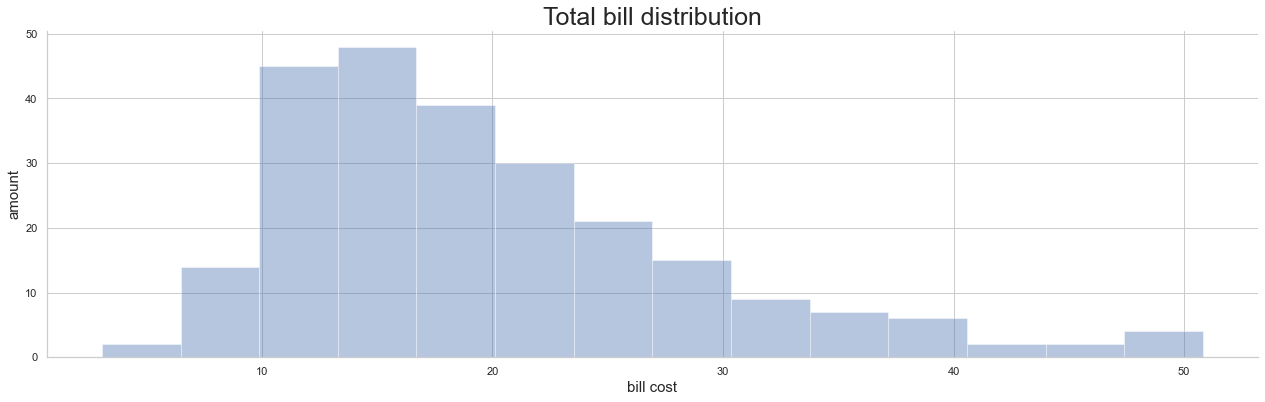

In [881]:
sns.set_context("notebook")
sns.distplot(x=tips["total_bill"], kde=False)
sns.despine(top=True) 
plt.title("Total bill distribution", fontsize=25)
plt.ylabel("amount", fontsize=15)
plt.xlabel("bill cost", fontsize=15)

<font color='blue'>As we saw before, the most common total bill amounts are comprehended between 10 and 20. We can see that in the histogram plot, which shows how data is set towards a <b>right skewed</b> distribution. This means that the concentration of the majority of the data is concentred slightly at the left (10-20), with not much data below 10, and a big portion of the data above 20, although this one is spread across many bins, creating this right-oriented tail.

### Modal Distribution
<font color='blue'>Looking for modes isn’t about finding a clear and correct answer about the number of modes in a distribution. The important part of this examination is to better understand your data and how it might be structured. 
In the previous chart we saw that the total_bill data is concentrated between 10 and 20, but it does have a prominent peak at 13-16 amount, which would be called the mode. Since it has only one mode, we can conclude that the histogram is <b>Unimodal</b>.

## SUMMARY STATISTICS
### Mean - Average

In [882]:
bill_avg = round(tips.total_bill.mean(), 2)
print("Average total bill: ", bill_avg)
tip_avg = round(tips.tip.mean(), 2)
print("Average tip per table: ", tip_avg)
print("Average percentage of bill for tips: ", round(tip_avg/bill_avg*100, 2), "%")

Average total bill:  19.79
Average tip per table:  3.0
Average percentage of bill for tips:  15.16 %


### Variance and Standard Deviation

In [883]:
tips.total_bill.mean() - tips.total_bill.std()

10.883530668093968

#### Variance

In [884]:
round(tips.total_bill.var(), 2)

79.25

#### Standard Deviation

In [885]:
std = round(tips.total_bill.std(), 2)
std

8.9

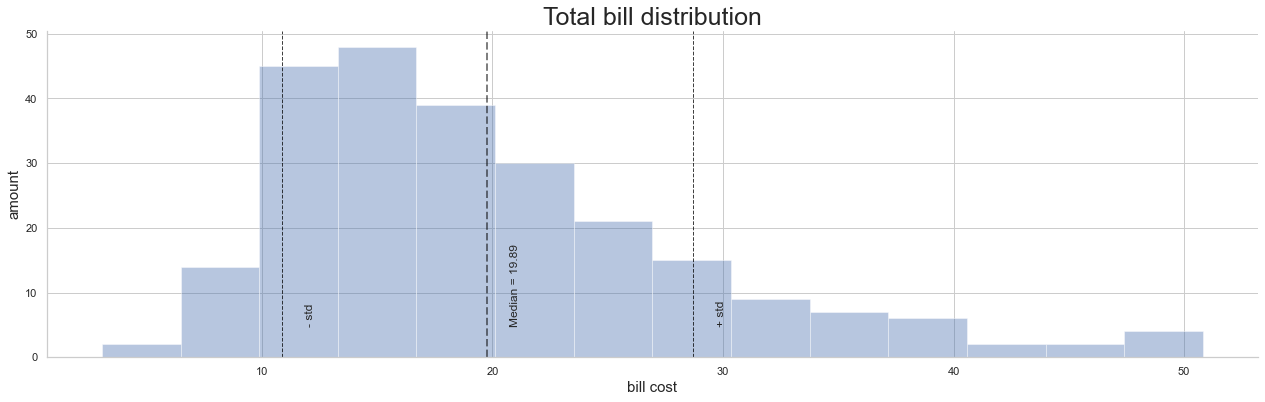

In [886]:
avg = tips.total_bill.mean()
sns.set_context("notebook")
sns.distplot(x=tips["total_bill"], kde=False)
sns.despine(top=True) 
plt.title("Total bill distribution", fontsize=25)
plt.ylabel("amount", fontsize=15)
plt.xlabel("bill cost", fontsize=15)
plt.axvline(x=avg, ls="--", color='black', linewidth=2, alpha=.5)
plt.text(avg+1, 5, "Median = 19.89", rotation=90)
plt.axvline(x=avg+std, ls="--", color='black', linewidth=1, alpha=.75)
plt.text(avg+std+1, 5, "+ std", rotation=90)
plt.axvline(x=avg-std, ls="--", color='black', linewidth=1, alpha=.75)
plt.text(avg-std+1, 5, "- std", rotation=90)

plt.show()

<font color='blue'>On first sight, same as we saw before, this plot shows about data: 
<br> - that the histogram is <b>strongly skewed to the high end</b> (aka right skewed distribution);
<br> - that there's a clear <b>concentration</b> of data <b>between 10 and 20</b> values;
<br> - there's a <b>prominent peak</b> of values in the <b>13-16 fork</b>;
<br> - this makes the dataset basically <b>Unimodal</b>.
 

Now with this new plot, by giving visibility to the <b>median (19.89)</b> and <b>Standard Deviation (+-8.90)</b>, we discover that the majority of the counts fall near the former, but also within one Standard Deviation. However, the long tail at the right end is moving the median slightly to the right too.

Text(3.7482786885245902, 42, 'medians')

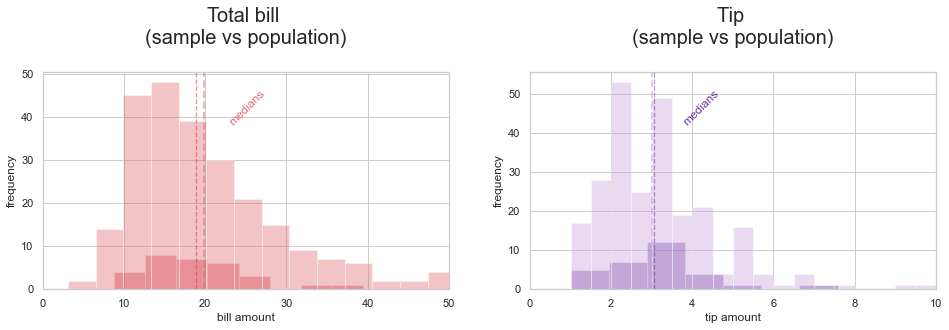

In [887]:
#creation of the main figure
fig, axes = plt.subplots(1,2, figsize=(16,4))

sample = tips.iloc[:30,:]   #selecting the sample


#creation of the first subplot: distribution of total_bill of a sample (first 30 rows)
s1 = sns.distplot(x=sample["total_bill"], kde=False, ax=axes[0], color="#d32e36")
s1.set_title("Total bill \n(sample vs population)", fontsize=20, y=1.1, x=0.50)
s1.set_xlim(0,50)
avg = sample["total_bill"].mean()
s1.axvline(x=avg, ls="--", color='#d32e36', linewidth=1.25, alpha=.5)
s1.set_xlabel("bill amount")
s1.set_ylabel("frequency")

#creation of the first subplot: distribution of total_bill of the whole population
s2 = sns.distplot(x=tips["total_bill"], kde=False, ax=axes[0], color="#e06c72")
avg = tips["total_bill"].mean()
s2.axvline(x=avg, ls="--", color='#e06c72', linewidth=2, alpha=.5)
s2.set_xlim(0,50)
s2.text(avg+3, 38, "medians", rotation=45, color='#e06c72')


#creation of the second subplot: distribution of tips of the sample (first 30 rows)
s3 = sns.distplot(x=sample["tip"], kde=False, ax=axes[1], color="#663399")  
s3.set_title("Tip \n(sample vs population)", fontsize=20, y=1.1, x=0.50)
s3.set_xlim(0,10)
avg = sample["tip"].mean()
s3.axvline(x=avg, ls="--", color='#663399', linewidth=1.25, alpha=.5)
s3.set_xlabel("tip amount")
s3.set_ylabel("frequency")

#creation of the second subplot: distribution of tips of the whole population
s4 = sns.distplot(x=tips["tip"], kde=False, ax=axes[1], color="#c9a0dc")
avg = tips["tip"].mean()
s4.axvline(x=avg, ls="--", color='#c9a0dc', linewidth=2, alpha=.5)
s4.set_xlim(0,10)
s4.text(avg+0.75, 42, "medians", rotation=45, color='#663399')

<font color='blue'>By overlapping plots, we've been able to layout how does the sample statistics compare to the population. <br> The first plot compares the total bill distribution with that of the whole population. The sample histogram is still <b>unimodal</b>, and concentred between 13-16, as the population's. The medians are slightly diferent but only by 2 units. In general, when it comes to analyzing the total bill data, taking this sample seems to be reliable. <br><br> The second plot, which covers how the tip distributes, also draws the comparative between the sample and the population. In this case we can see some diferences. The <b>population</b> showed a <b>right skewed distribution</b>, whereas the <b>sample</b> output shows and slightly <b>left-skewed distrubution</b>, or even <b>symmetric</b>. The sample is showing <b>unimodal distribution</b>, while we saw how the population was <b>bimodal</b>. Despite this, both medians are equal, so if our study is not too complex, we can use this sample with some confidence. 

### BOX PLOTS

In [888]:
tips["total_bill"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

Median:  17.795


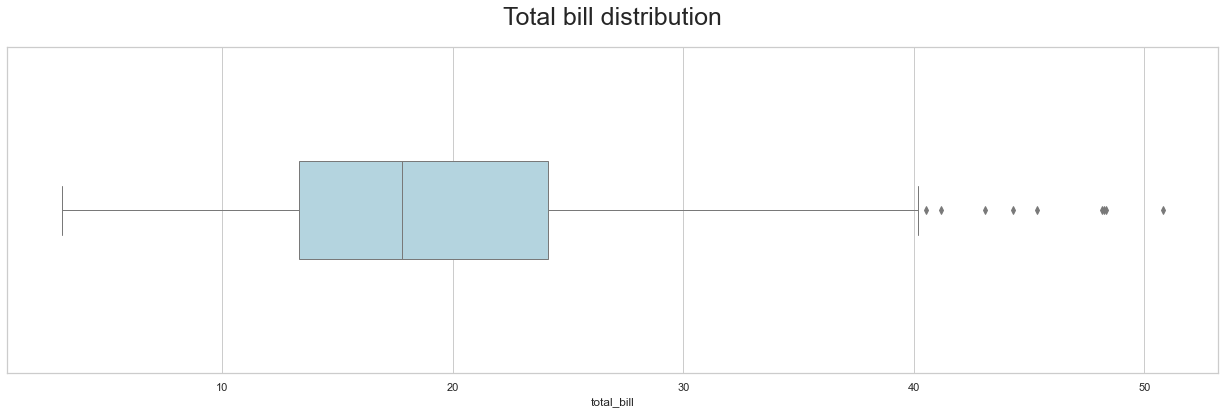

In [889]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=tips["total_bill"], color="lightblue", fliersize=5, orient="v", linewidth=1, width=0.3)
plt.title("Total bill distribution", fontsize=25, y=1.05)
print("Median: ", tips["total_bill"].median())

<font color='blue'>This time through a box plot, but we can still see how the distribution of the bills are concentred between 12 and 24 (this is, the <b>Interquartile range (or IQR)</b>), were it lies the 50% of the data and the prominent peak/s. One can also see the <b>median (17.795)</b> slightly leaning to the bottom, meaning that the majority of value lie closer to total bill=12 than total bill=24. Next, there's a 50% of data distributed below 10 and above 25 fairly evenly, as we can observe from the <b>lower and higher whiskers</b>. Lastly, there's a bunch of <b>outliers</b> located beyond value 40 which are not considered but exist.

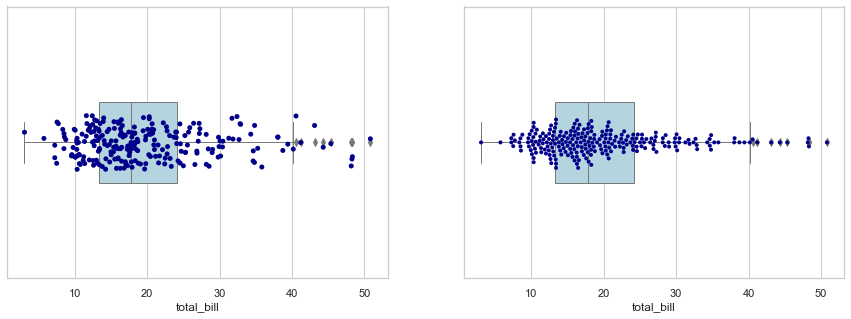

In [890]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.set(style="whitegrid")

#preparing subplot 1
ax = sns.boxplot(x="total_bill", data=tips, color="lightblue", fliersize=5, orient="v", linewidth=1, width=0.3, ax=axes[0])
ax = sns.stripplot(x=tips["total_bill"], orient="v", color="darkblue", ax=axes[0])

#preparing subplot 2
ax = sns.boxplot(x=tips["total_bill"], color="lightblue", fliersize=5, orient="v", linewidth=1, width=0.3, ax=axes[1])
ax = sns.swarmplot(x=tips["total_bill"], data=tips, color="darkblue", orient="v", size=4, ax=axes[1])

<font color='blue'>Two similar plots that combine the boxplot power discussed before with the literal visualitzation of the values. This way 
the information is more visual, but it only adds the sense of how many units are considered in every quartile (rather than just relying on the boxplot).

In [891]:
lst = tips["total_bill"].sort_values()                 #sorting the list of values
lgh = len(lst)                                         #total rows
q1 = lst.iloc[int(lgh/4)-1]                                 #Q1
mdn = (lst.iloc[int(lgh/2)-1] + lst.iloc[int(lgh/2)]) /2    #median (Q2)
q3 = lst.iloc[int(lgh/4)*3]                                 #Q3
iqr = q3-q1                                                 #IQR
print(q1, "  ", mdn,"  ", q3,"  ", iqr)                    

13.28    17.795    24.27    10.99


My guess about quartiles: 
<br> -<b> Q1:</b> 12
<br> -<b> Q3:</b> 24
<br> -<b> IQR:</b> 18
<br><br>Actual quartiles based on data:
<br> -<b> Q1:</b> 13.28
<br> -<b> Q3:</b> 24.27
<br> -<b> IQR:</b> 10.99

## Ejercicio Practico -- Scatter Plots

In [892]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


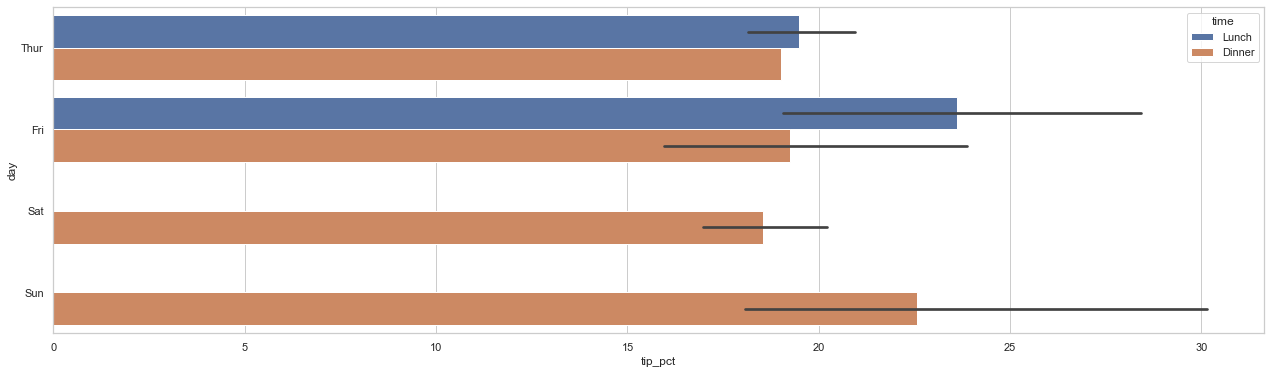

In [893]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

<font color='blue'>The plot above crosses the percentage of tips from the bill, comparing each day across Thursday-Sunday. Looks like on Friday lunch and Sunday dinner people tend to leave higher percentage of tip (average 22.5%), although this can vary drastically on a range between 17 and 29. <br>We can also observe that there's no Lunch service on weekends.

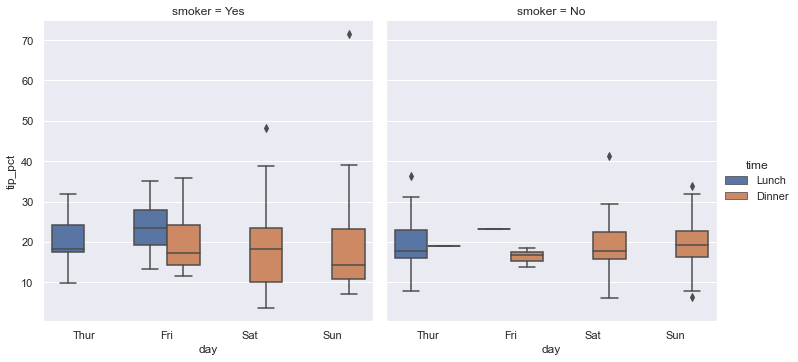

In [894]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='box', data=tips[tips.tip_pct < 245])

<span class="mark"> # MOVIES DATASET -----------------------------------------------------------------------------------------------------------------------------------------------------------------</span>
### Nivell 2 i 3

###### - Exercici 2 i 3
<font color='blue'>Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

In [895]:
#we'll start by laying out the first sensible table, after doing some tweaks and cleans

#import the csv
movies = pd.read_csv(r'C:\Users\pacressa\Google Drive\Paul\Formacions\Numbers\CODING\BCN Activa - Data Science (Python)\Sprint 3. Visualitzacio de dades\S03T02\movies.dat.txt', sep="::", header=None, names=["id","Title","Genre"])
movies.drop("id", axis=1, inplace=True)

#separating data and creating new columns
movies["Year"] = movies.Title.apply(lambda x: x[-5:-1])
movies["Title"] = movies.Title.apply(lambda x: x[:-7])

#updating the datatypes
movies["Title"] = movies["Title"].astype("str")
movies["Year"] = movies["Year"].astype("int64")
print("\nSHAPE:", movies.shape)
#print("\nAny duplicates? ", movies.duplicated().any())       #CHECK IF THERE'S ANY DUPLICATES
#print("\nAny missing value?\n", movies.isnull().any())       #CHECK IF THERE'S ANY MISSING VALUE (aka NANs)
#print(movies.describe(include="all").round(2))               #CHECK MINs AND MAXs


SHAPE: (3883, 3)


<font color='blue'>We imported the movies dataset and added the columns for better understanding and visibility. We had to separate the year values from the titles of each movie. 

In [896]:
print(movies.columns)
print("\nDATATYPES:\n", movies.dtypes)

Index(['Title', 'Genre', 'Year'], dtype='object')

DATATYPES:
 Title    object
Genre    object
Year      int64
dtype: object


In [897]:
movies.head()

,Title,Genre,Year
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995


<font color='blue'>Apparently the genres are merged in a single string together in the column "Genre", which will make things a bit more complicated use later to draw statistics, but still doable. We'll keep the Genre column as it is, but with the function below we'll save a list of the unique genre values to have it ready at hand:

In [898]:
#check all the different kinds of genres in the dataframe
m = movies.copy()
m["Genre"] = m.Genre.str.split("|")
def gen_types(row):
    x=[]
    for ro in row:
        for r in ro:
            if(r not in x):
                x.append(r)
    return x

gen_types = gen_types(m["Genre"])
print(gen_types)

['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']


In [899]:
print("Min year: ", movies.Year.min())
print("Max year: ", movies.Year.max())
print("Total kinds of genres: ", len(gen_types))

Min year:  1919
Max year:  2000
Total kinds of genres:  18


In [900]:
#CHECK IF THERE'S ANY DUPLICATES
print("\nAny duplicates? ", len(movies.Title[movies.Title.duplicated()]))
print("\nSample list of duplicates:\n ", movies[["Title","Year"]].sort_values(by="Title")[movies.Title.duplicated(keep=False)])

print("\nAny missing value?\n", movies.isnull().any())       #CHECK IF THERE'S ANY MISSING VALUE (aka NANs)


Any duplicates?  42

Sample list of duplicates:
                                             Title  Year
1346                              101 Dalmatians  1996
2016                              101 Dalmatians  1961
843   Ballad of Narayama, The (Narayama Bushiko)  1958
2443  Ballad of Narayama, The (Narayama Bushiko)  1982
1323                                   Cape Fear  1962
...                                          ...   ...
2492                                  True Crime  1999
328                        Village of the Damned  1995
2484                       Village of the Damned  1960
3753                                  Wonderland  1999
1611                                  Wonderland  1997

[80 rows x 2 columns]

Any missing value?
 Title    False
Genre    False
Year     False
dtype: bool


<font color='blue'>Now that the dataset is ready, we can see some of its features:
- The dataset includes movies from 1919 till 2000.
- We found out that there's 3883 movies in the dataset.
- There are 18 different kinds of genres, combined and mixed for each movie.
- There are 42 titles of movie that repeat at least once, coming from prequels and sequels.
- There are no rows or columns with missing values or NaNs.
    
    
 Let's now unveil what else is hidden in the dataset with the help of some plots:

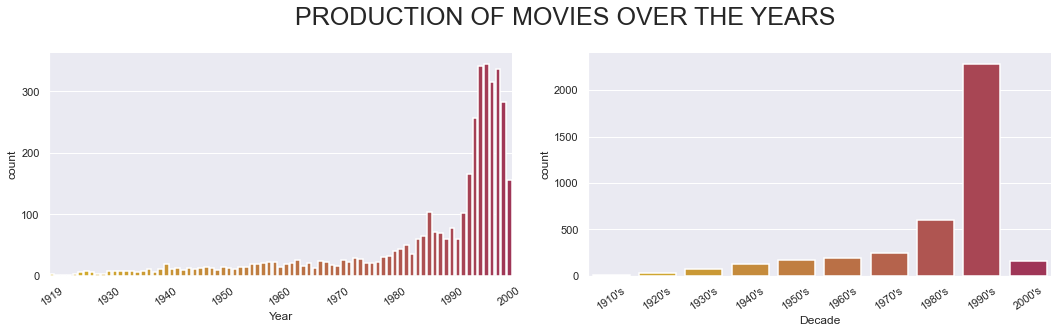

In [901]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
#plot 1 creation 
sns.set_context("talk")
ax1 = sns.countplot(data=movies, x="Year", palette=sns.blend_palette(['#f1c40f','#b12450'], movies.Year.nunique()), 
                    ax=axes[0])
#sns.set(rc={'figure.figsize':(21.7,6)})

#plot configuration
sns.set_style("whitegrid")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=35)
for index, label in enumerate(ax1.get_xticklabels()):
   if index % 10 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
sns.despine()
fig.tight_layout(pad=1, w_pad=1, h_pad=1)

#titles and labels
plt.title("PRODUCTION OF MOVIES OVER THE YEARS", fontsize=25, x=-0.05, y=1.10)

###########################################
#plot 2 creation 
movies["Decade"] = movies.Year.apply(lambda x: "2000's" if str(x)[2]=="0" else "19"+str(x)[2]+"0's")
ax2 = sns.countplot(data=movies.sort_values(by="Decade"), x="Decade", palette=sns.blend_palette(['#f1c40f','#b12450'], 
      movies.Decade.nunique()), ax=axes[1])

#plot configuration
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=35)

fig.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

<font color='blue'>At first sight we can derive from the plot that there's been a strong increase of movies along the 20th century. The plot shows a regular increase from 1919 (the first movie registered) until the 1980's, when there's a clear pouring of investment in the industry increasing the movies by double in a decade (from 25 movies to 50). Though, the most remarkable period for the movies industry will come during the 1990's when the amount of movies produced grew seven-fold (from 50 to 350). It's worth to mention that Action movies helped to start the movies industry at the 1910's, but then curiously disappeared until the 70's/80's when came back strong. Musical genre had algo its moment in the 30's, combined with Romance movies.  Finally, the decade with more Horror component was the 80's.  <br>
Let's dive deeper into the different movie genres:

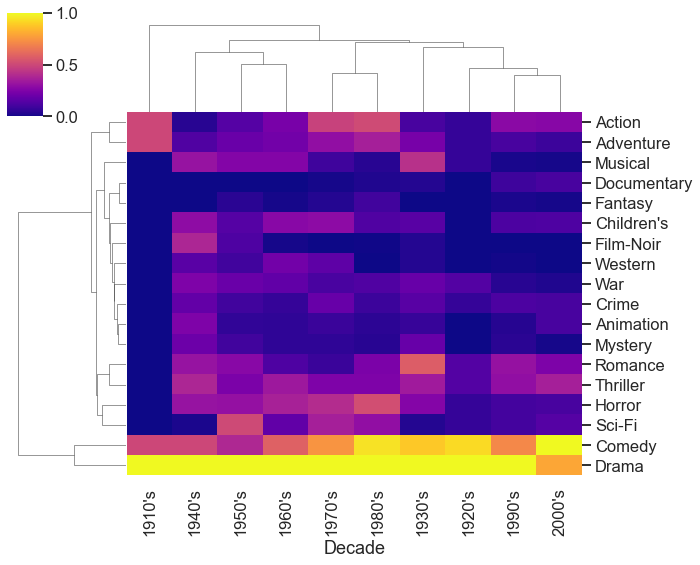

In [902]:
#creating the table to gather the number of movies of each genre per decade
dg=movies["Genre"].str.get_dummies(sep="|")
dg["Decade"] = movies["Decade"]
dg2 = dg.groupby("Decade").sum().T
dg.drop("Decade", axis=1, inplace=True)

#using the matrix above to create a clustermap
sns.clustermap(dg2, cmap="plasma", standard_scale=1, figsize=(10,8))

<font color='blue'>With this general chart we are able to quickly see the impact of each genre in the dataset. Looks like Drama and Comedy are the two most common genres along the century. Drama has led the movies industry every decade except the 2000's, when comedies took over the podium. Lets find out how big was the impact of these two genres with a more detailed plot:

Text(0.5, 1.0, 'GENRES ALL TIME')

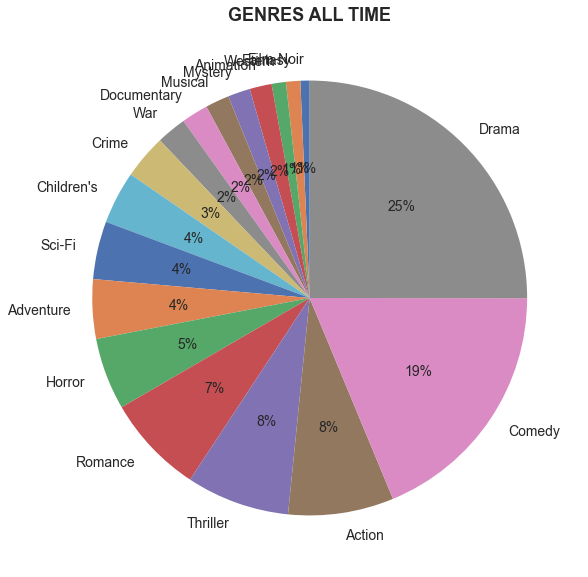

In [903]:
plt.figure(figsize=(10,10))
dg.sum().sort_values().plot(kind="pie", autopct='%1.0f%%', textprops={'fontsize': 14}, wedgeprops = {'linewidth': 0},
                           startangle = 90)
plt.ylabel("")
plt.title("GENRES ALL TIME", fontweight='bold')

<font color='blue'>Effectively, Drama and Comedy are the most recurred genres across the century, with Drama representing the 25% of the movies and Comedy appearing in the 19%. The rest of genres are all below the 10% representation, so there's a clear difference between the top2 genres and the rest.